fig1: Before Optimization using random slope - 0.8999999761581421 and y-intercept - 0.10000000149011612
fig2: After Optimization using random slope - -1.8779854774475098 and y-intercept - 5.793229579925537


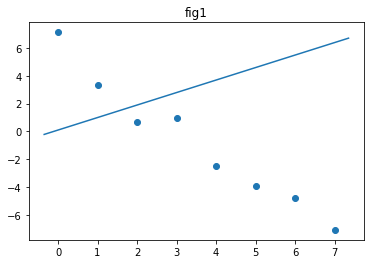

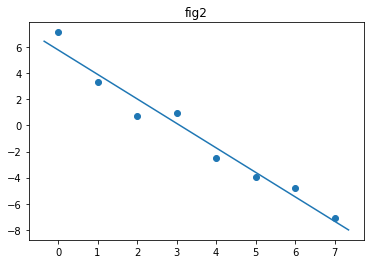

In [27]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def regression(x, m, b):
    return m * x + b

def regression_plot(my_x, my_y, my_m, my_b, figName=None):
    fig, ax = plt.subplots()
    ax.set_title(figName)
    ax.scatter(my_x, my_y)
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    _ = ax.plot([x_min, x_max], [y_min, y_max])

def cost_func(y_dash, y): 
    sigma = torch.sum((y_dash - y)**2)
    return sigma/len(y)

x = torch.tensor(np.arange(0, 8, dtype=float))
y = -2.7 * x + 4 + torch.normal(mean=torch.arange(1., 9.), std=torch.arange(0.8, 0, -0.1))

#Initial slope and y-intercept
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

print(f"fig1: Before Optimization using random slope - {m.item()} and y-intercept - {b.item()}")
regression_plot(x, y, m, b, "fig1")

epochs = 2100
optimizer = torch.optim.SGD([m,b], lr=0.01)
for epoch in range(epochs):
    optimizer.zero_grad()
    y_dash = regression(x, m, b)
    cost = cost_func(y_dash, y)

    cost.backward()
    optimizer.step()
    # print(f"Epoch - {epoch}, cost - {cost}, slope - {m.item()}, y-intercept - {b.item()}")

print(f"fig2: After Optimization using random slope - {m.item()} and y-intercept - {b.item()}")
regression_plot(x, y, m, b, "fig2")